In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('Time_series_analysis_and_forecast_DATASET.csv')
df.head()

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01 00:00:00,15.8,1688.215,3.69,23.710
1,2010-09-01 01:00:00,15.8,1669.195,3.69,22.635
2,2010-09-01 02:00:00,15.8,1491.980,3.69,22.565
3,2010-09-01 03:00:00,15.8,1330.760,3.69,18.910
4,2010-09-01 04:00:00,15.8,1247.940,3.69,18.030


In [4]:
df.shape

(92016, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92016 entries, 0 to 92015
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   FullDate   92016 non-null  object 
 1   Tmax       92016 non-null  float64
 2   SysLoad    92016 non-null  float64
 3   GasPrice   92016 non-null  float64
 4   ElecPrice  92016 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.5+ MB


In [6]:
df['ElecPrice'].unique

<bound method Series.unique of 0         23.710
1         22.635
2         22.565
3         18.910
4         18.030
          ...   
92011    117.925
92012     87.880
92013     62.060
92014     62.000
92015     62.955
Name: ElecPrice, Length: 92016, dtype: float64>

In [7]:
df.describe(include='all')

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
count,92016,92016.000000,92016.000000,92016.000000,92016.000000
unique,92016,NaN,NaN,NaN,NaN
top,2010-09-01 00:00:00,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN
mean,NaN,231.696688,797.623357,6.016163,65.798356
std,NaN,4562.128748,613.520156,2.608116,213.144084
min,NaN,9.900000,-1596.810100,0.000000,-924.820000
25%,NaN,17.300000,417.119800,3.936900,31.543750
50%,NaN,21.900000,856.467925,5.165600,48.715000
75%,NaN,27.600000,1221.293675,8.023300,76.495000


In [8]:
#Resampling from hour to day sampling
df['FullDate'] = pd.to_datetime(df['FullDate'])
df = df.set_index('FullDate') 
df = df.resample('D').sum() 
df = df.reset_index()
df.head()

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01,379.2,41565.380,88.56,2751.700
1,2010-09-02,369.6,38898.990,88.56,570.810
2,2010-09-03,439.2,41665.760,106.80,504.975
3,2010-09-04,328.8,35638.085,81.36,502.275
4,2010-09-05,357.6,35611.410,106.80,500.555


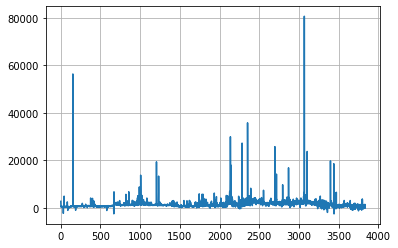

In [9]:
plt.plot(df.index, df.ElecPrice)
plt.grid()

##### P-value of the SysLoad and GasPrice of the resampled Data set using the Augmented Dicky Fuller test (ADF) to 6 decimal places.

##### The 10% and 5% critical values of GasPrice and ElecPrice of the resampled Data set to 4 decimal places, using the Augmented Dicky Fuller test (ADF)

both can be obtained from single function

In [10]:
from statsmodels.tsa.stattools import adfuller

In [11]:
adfuller(df['SysLoad'])

(-3.6901589888366457,
 0.004253725504574117,
 30,
 3803,
 {'1%': -3.432070672988693,
  '5%': -2.8623002987378547,
  '10%': -2.567174716967499},
 79103.01504886392)

In [12]:
adfuller(df['GasPrice'])

(-2.90276669716518,
 0.04502721288462542,
 27,
 3806,
 {'1%': -3.4320693157877544,
  '5%': -2.8622996992165364,
  '10%': -2.5671743978048323},
 32857.5394299048)

Further Instructions (14-16)
Using the daily sampling rate (sum), divide the data into a train and test set. The first 2757 days is your train set and the last (x-2757) days is your test set. Where x is the length of the dataset. Use Facebook Prophet to train a Univariate time series model using the FullDate column as (‘dt’ or ‘ds’) and ElecPrice as ( ‘y’). Answer question 14 - 16

In [13]:
df = df.rename({'FullDate':'ds', 'ElecPrice':'y'}, axis=1)  
df.head()

,ds,Tmax,SysLoad,GasPrice,y
0,2010-09-01,379.2,41565.380,88.56,2751.700
1,2010-09-02,369.6,38898.990,88.56,570.810
2,2010-09-03,439.2,41665.760,106.80,504.975
3,2010-09-04,328.8,35638.085,81.36,502.275
4,2010-09-05,357.6,35611.410,106.80,500.555


In [14]:
df.shape

(3834, 5)

In [15]:
3834-2757

1077

In [16]:
train = df[0:2757]
test  = df[2757:]

In [17]:
train.shape

(2757, 5)

In [18]:
test.shape

(1077, 5)

In [19]:
from fbprophet import Prophet
model=Prophet()
model.fit(train)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [20]:
pred = model.predict(test) 
pred.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-03-20,2691.764386,222.790655,4773.946488,2691.764386,2691.764386,-155.426892,-155.426892,-155.426892,9.749221,9.749221,9.749221,-165.176114,-165.176114,-165.176114,0.0,0.0,0.0,2536.337494
1,2018-03-21,2692.580955,348.802413,5168.530036,2692.580955,2692.580955,-2.925496,-2.925496,-2.925496,159.308129,159.308129,159.308129,-162.233625,-162.233625,-162.233625,0.0,0.0,0.0,2689.655459
2,2018-03-22,2693.397524,227.228506,5022.874028,2693.397524,2693.397524,95.308217,95.308217,95.308217,257.036327,257.036327,257.036327,-161.728110,-161.728110,-161.728110,0.0,0.0,0.0,2788.705741
3,2018-03-23,2694.214093,285.385204,4993.603900,2694.214093,2694.214093,-113.236873,-113.236873,-113.236873,50.257478,50.257478,50.257478,-163.494350,-163.494350,-163.494350,0.0,0.0,0.0,2580.977221
4,2018-03-24,2695.030663,60.212348,4590.429603,2695.030663,2695.030663,-438.662722,-438.662722,-438.662722,-271.372061,-271.372061,-271.372061,-167.290660,-167.290660,-167.290660,0.0,0.0,0.0,2256.367941


In [21]:
from sklearn import metrics
def mean_absolute_percentage_error(y,y_pred):
  y,y_pred = np.array(y), np.array(y_pred)
  return np.mean(np.abs((y - y_pred)/y)) *100
mape=mean_absolute_percentage_error(test['y'],pred['yhat'])
mape

549.4751413716547

In [22]:
rmse = round(np.sqrt(metrics.mean_squared_error(test['y'],pred['yhat'])), 2)
rmse

3218.16

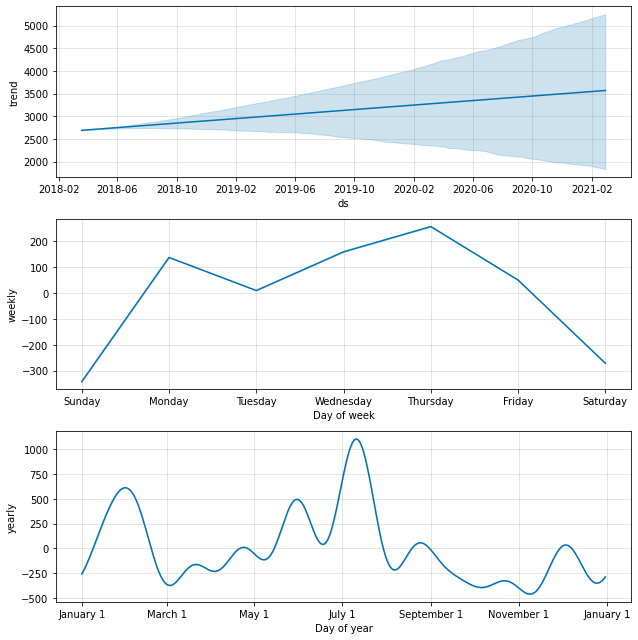

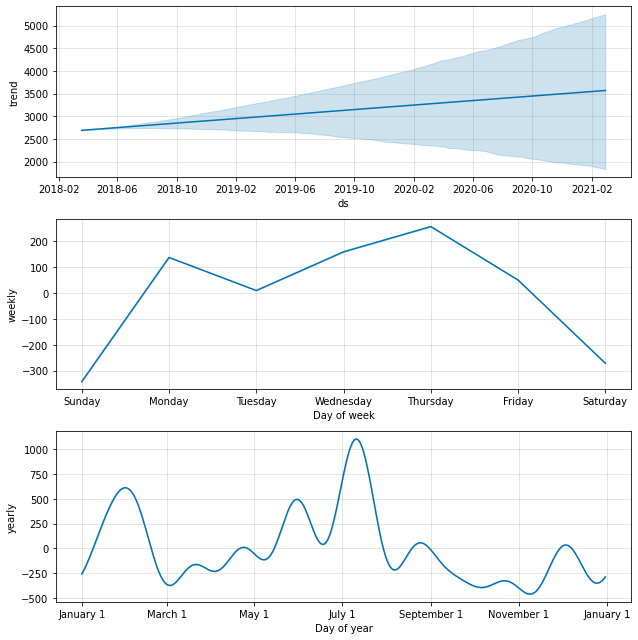

In [34]:
model.plot_components(pred)

Multivariate Time Series Forecasting with Facebook Prophet

In the last exercise, we used only the dependent variable (ElecPrice) and the time component for our modeling (ds vs y). Next, we will build a time series model using the other variables. These variables will be added to the forecast model as a regressor on Facebook Prophet. So the 3 independent variables [‘SysLoad’,’Tmax’,’GasPrice’'] will be [‘add1’, ‘add2’, ‘add3’’] as the regressors. Split the data into train and test as done above and build a multivariate forecast model to forecast the last x-2757 days of ElecPrice. Answer question 17-19:


In [23]:
df.head()

,ds,Tmax,SysLoad,GasPrice,y
0,2010-09-01,379.2,41565.380,88.56,2751.700
1,2010-09-02,369.6,38898.990,88.56,570.810
2,2010-09-03,439.2,41665.760,106.80,504.975
3,2010-09-04,328.8,35638.085,81.36,502.275
4,2010-09-05,357.6,35611.410,106.80,500.555


In [47]:
df = df.rename({ 'SysLoad':'add1','Tmax':'add2', 'GasPrice':'add3'}, axis=1)
df.head()

,ds,add2,add1,add3,y
0,2010-09-01,379.2,41565.380,88.56,2751.700
1,2010-09-02,369.6,38898.990,88.56,570.810
2,2010-09-03,439.2,41665.760,106.80,504.975
3,2010-09-04,328.8,35638.085,81.36,502.275
4,2010-09-05,357.6,35611.410,106.80,500.555


In [48]:
train = df[0:2757]
test  = df[2757:]

In [49]:
model2 = Prophet()
model2.add_regressor('add1')
model2.add_regressor('add2')
model2.add_regressor('add3')

In [50]:
model2.fit(train)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [51]:
pred = model2.predict(test)

In [52]:
def mean_absolute_percentage_error(y,y_pred):
  y,y_pred = np.array(y), np.array(y_pred)
  return np.mean(np.abs((y - y_pred)/y)) *100
mape=mean_absolute_percentage_error(test['y'],pred['yhat'])
mape

231.28067149407525

In [53]:
rmse = round(np.sqrt(metrics.mean_squared_error(test['y'],pred['yhat'])), 2)
rmse

2706.92

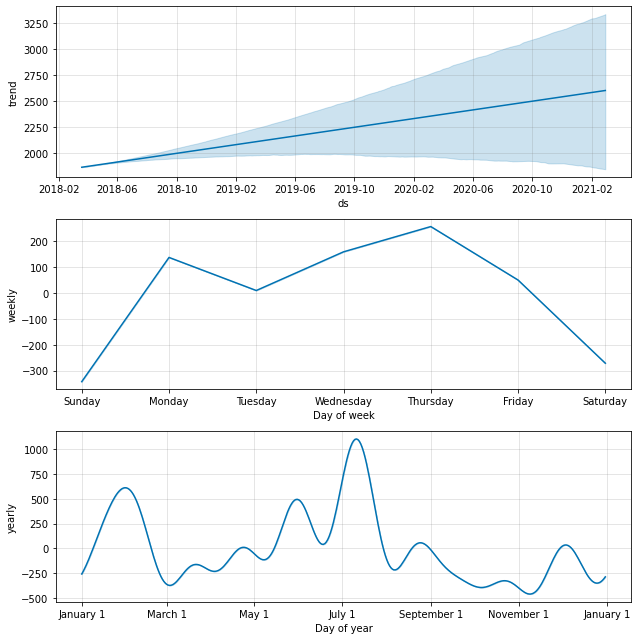

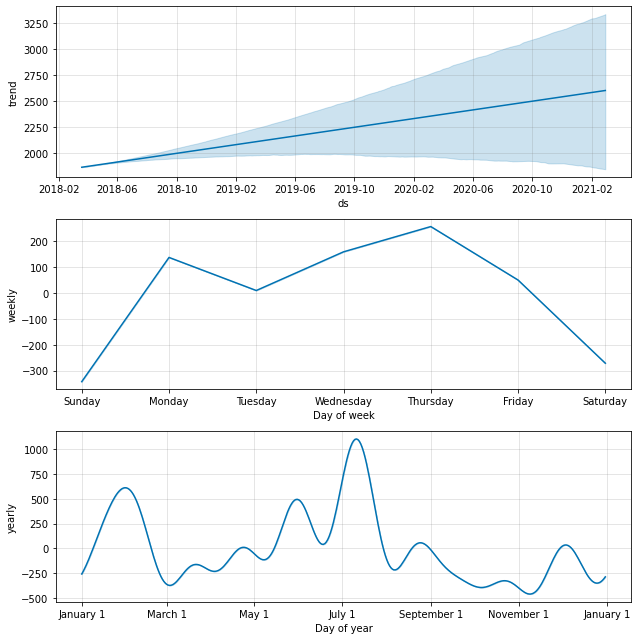

In [54]:
model.plot_components(pred)

In [55]:
model3 = Prophet()
model3.add_regressor('add1')
model3.add_regressor('add3')

model3.fit(train)
pred = model3.predict(test)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [56]:
mape=mean_absolute_percentage_error(test['y'],pred['yhat'])
mape

233.7211726531121